# Explore here

In [32]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [36]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [37]:
numericas=[]
categoricas=[]
for columns in df.columns:
    if df[columns].dtype in ['int64', 'float64']:
        numericas.append(columns)
    else:
        categoricas.append(columns)
print(f'las columnas numericas son: {numericas}')
print(f'las columnas categoricas son: {categoricas}')

las columnas numericas son: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
las columnas categoricas son: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [38]:
for column in categoricas:
    df[column+"_num"] = pd.factorize (df[column])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [ ]:
#quedarnos solo con las variables numericas
#esto significa que me voy a quedar con todas las columnas que no estan en la lista que se llama "categoricas"
#se pone axis=1 para que se eliminen las columnas
df_numerico = df.drop(columns=categoricas, axis=1)
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   duration         41188 non-null  int64  
 2   campaign         41188 non-null  int64  
 3   pdays            41188 non-null  int64  
 4   previous         41188 non-null  int64  
 5   emp.var.rate     41188 non-null  float64
 6   cons.price.idx   41188 non-null  float64
 7   cons.conf.idx    41188 non-null  float64
 8   euribor3m        41188 non-null  float64
 9   nr.employed      41188 non-null  float64
 10  job_num          41188 non-null  int64  
 11  marital_num      41188 non-null  int64  
 12  education_num    41188 non-null  int64  
 13  default_num      41188 non-null  int64  
 14  housing_num      41188 non-null  int64  
 15  loan_num         41188 non-null  int64  
 16  contact_num      41188 non-null  int64  
 17  month_num   

In [42]:
df_numerico = df_numerico.drop_duplicates()
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41176 non-null  int64  
 1   duration         41176 non-null  int64  
 2   campaign         41176 non-null  int64  
 3   pdays            41176 non-null  int64  
 4   previous         41176 non-null  int64  
 5   emp.var.rate     41176 non-null  float64
 6   cons.price.idx   41176 non-null  float64
 7   cons.conf.idx    41176 non-null  float64
 8   euribor3m        41176 non-null  float64
 9   nr.employed      41176 non-null  float64
 10  job_num          41176 non-null  int64  
 11  marital_num      41176 non-null  int64  
 12  education_num    41176 non-null  int64  
 13  default_num      41176 non-null  int64  
 14  housing_num      41176 non-null  int64  
 15  loan_num         41176 non-null  int64  
 16  contact_num      41176 non-null  int64  
 17  month_num        

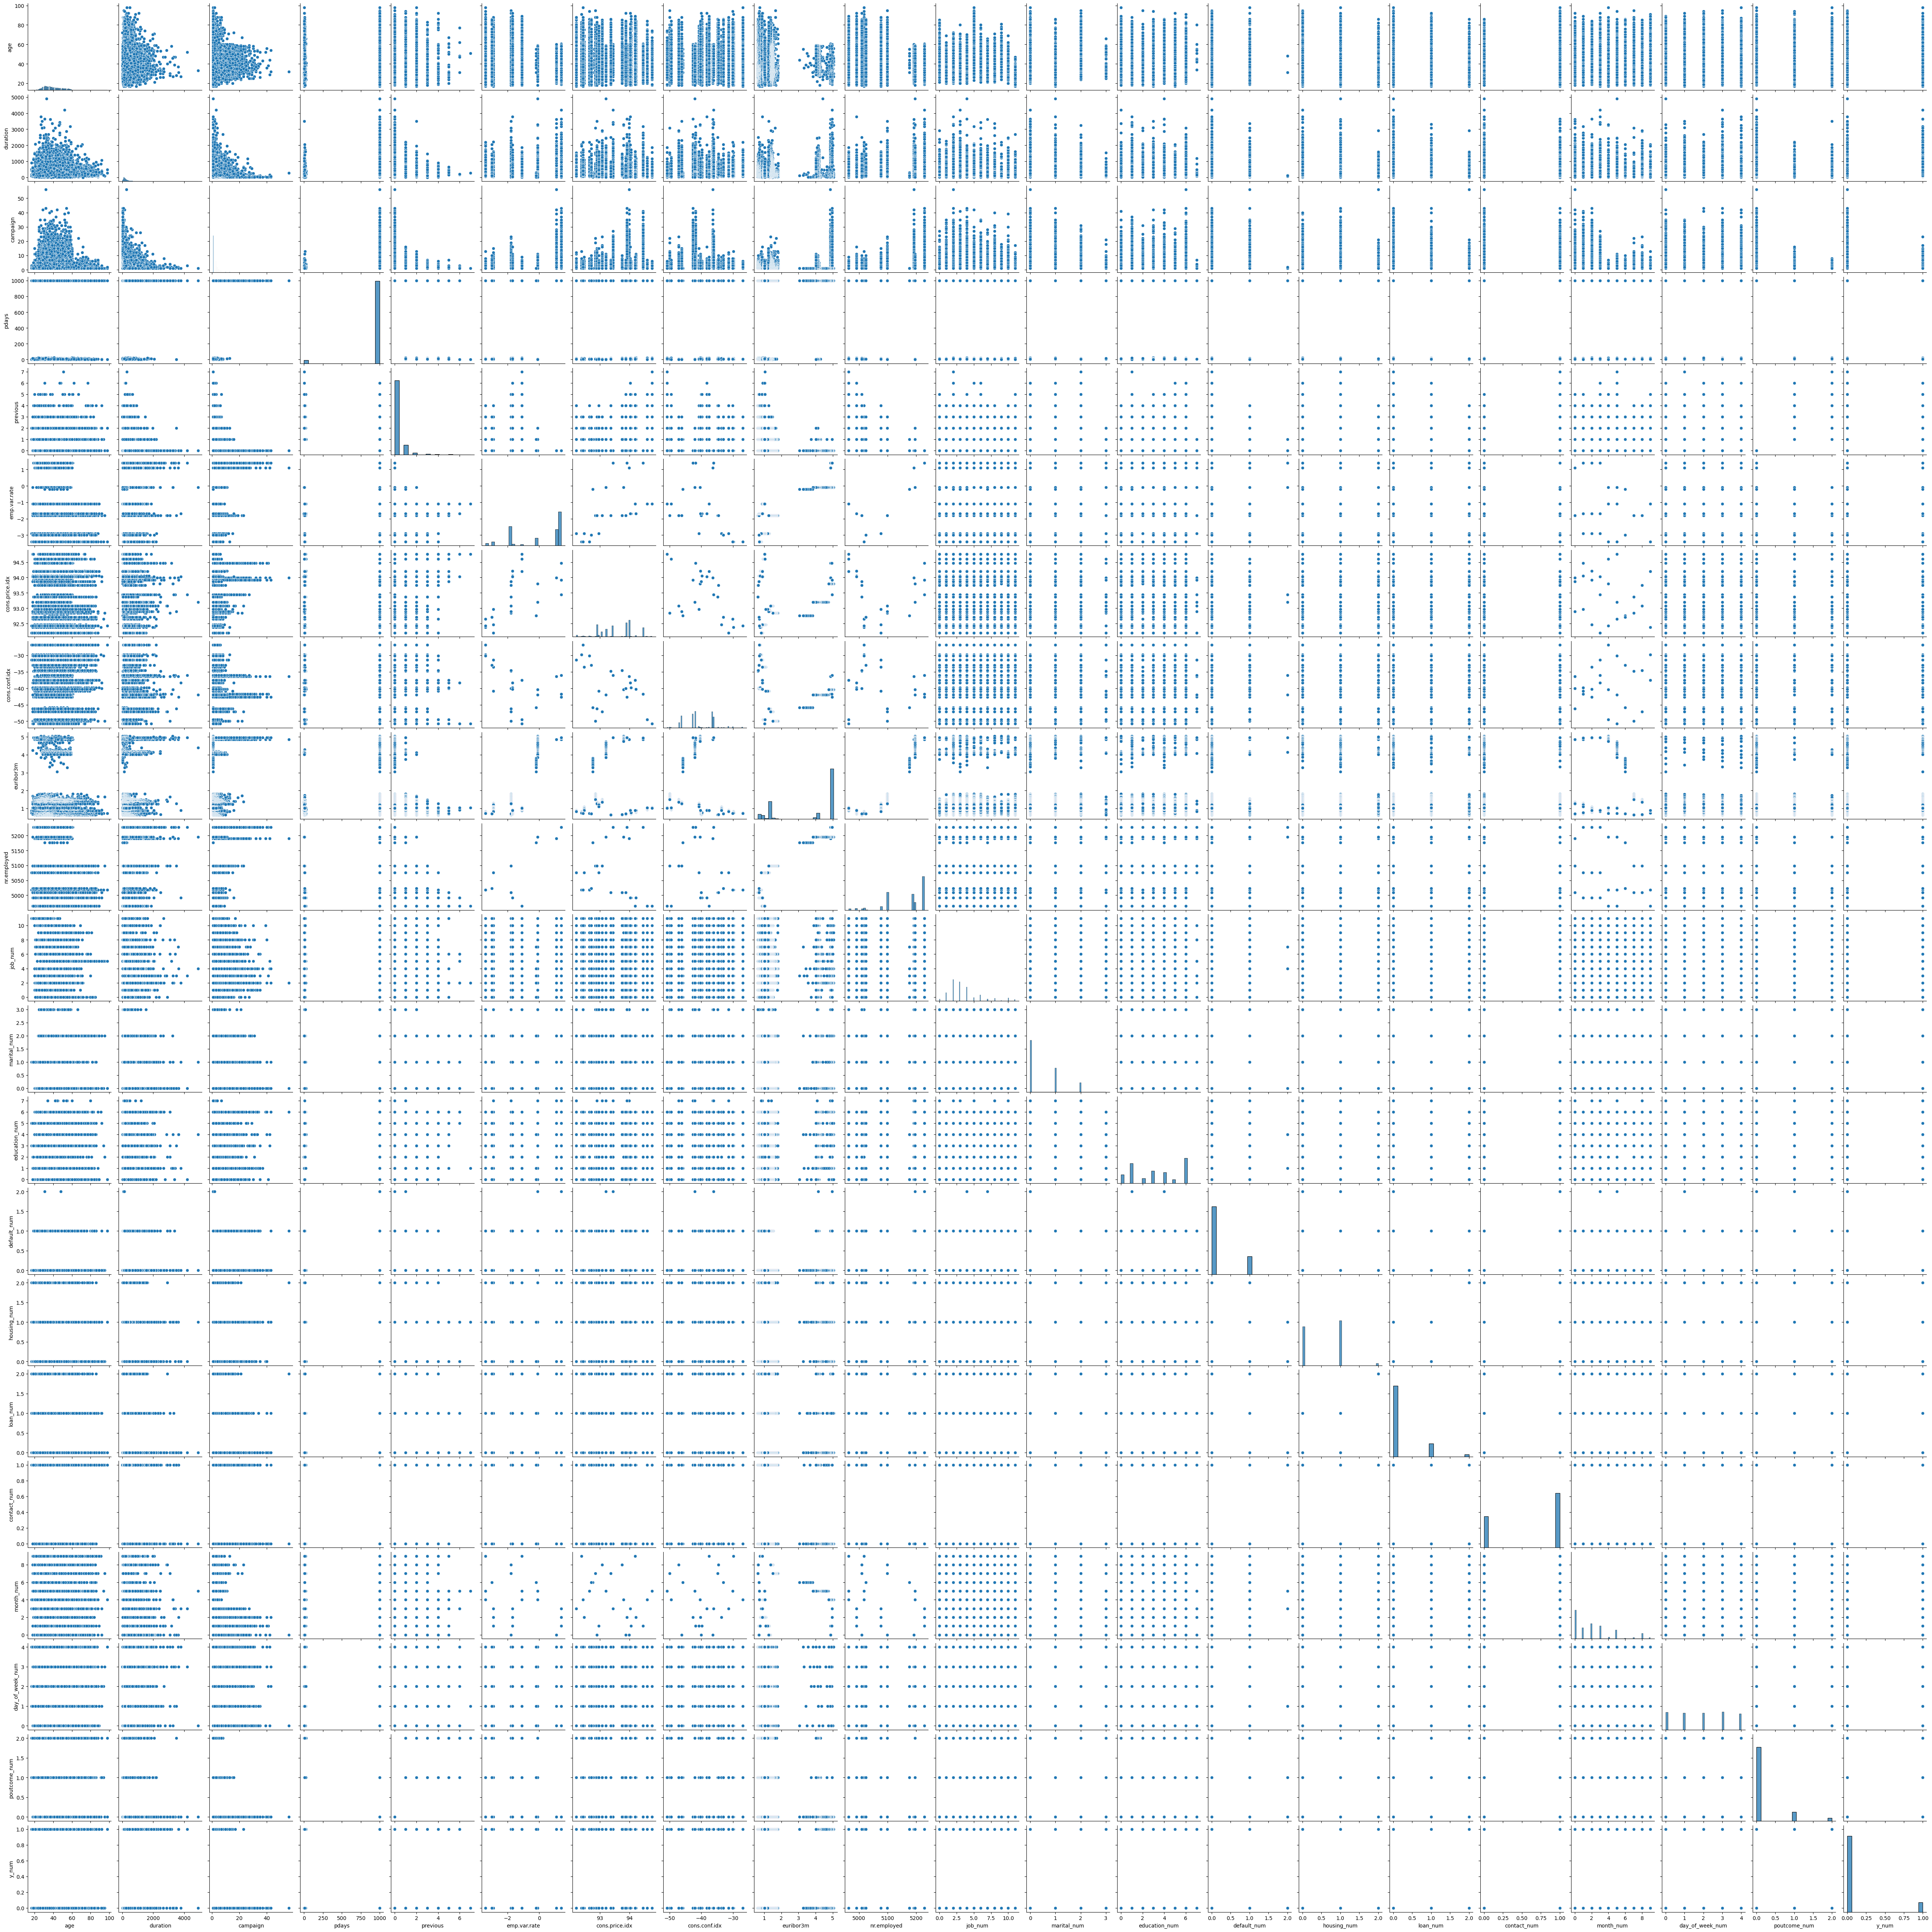

In [ ]:
#analisis numerico numerico 
#esto lo hacemos con una instruccion que nos permite ver todos los analsis 
sns.pairplot(df_numerico)
#es mejor patir de pairplot y de las relaciones que veamos ahi, utilizamos otros analisis mas especificos
#si tenemos una base de datos que esta todo numericom es mejor utilizar pairplot
#agregar plt.show() para que se muestre el grafico
# no tengo correlaciones entre las variables, ya que no se ve ningun patron claro, o puntos que esten subiendo o bajando 

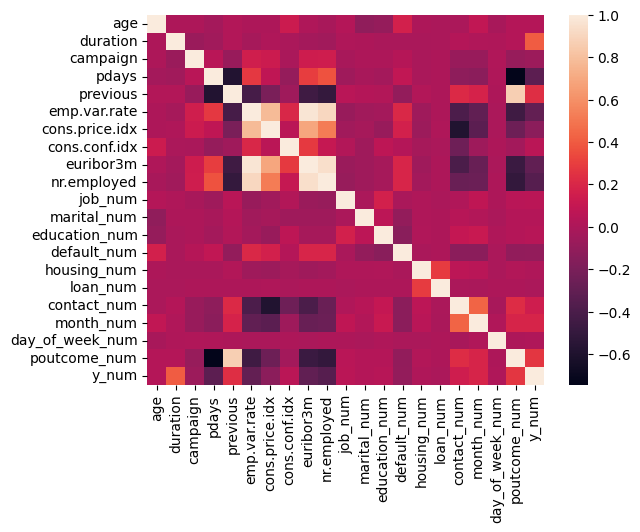

In [ ]:
#hacer grafico de correlaciones se hace con el mapa de calor
sns.heatmap(data=df_numerico.corr())
#en esto vemos las correlaciones entre las variables, por lo menos puedo ver las variables que tiene fuerte correlacion
#aqui lo que buscamos son valores extremos
#las correlaciones no tiene que ser estrictamente poistivas o negativas para que nos ayude a predecir otras variables
plt.show()

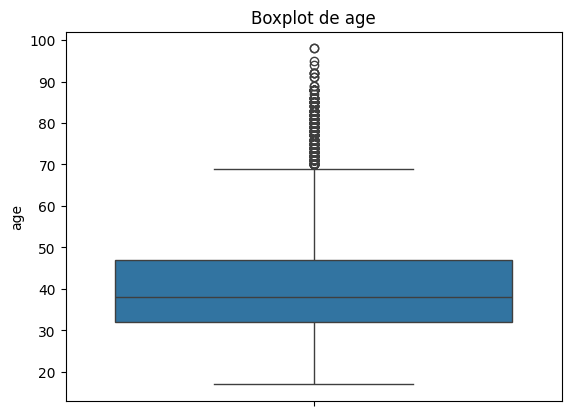

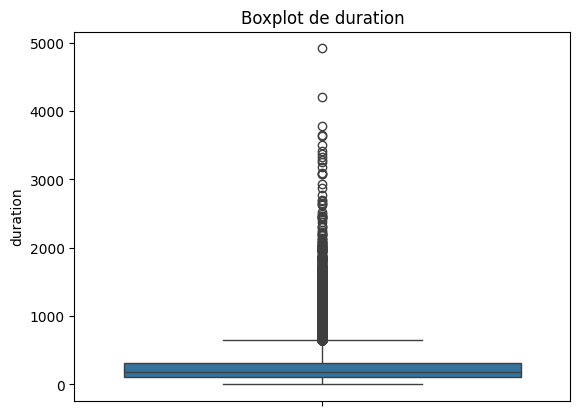

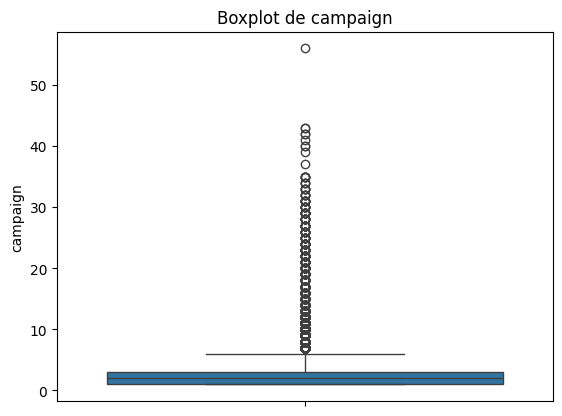

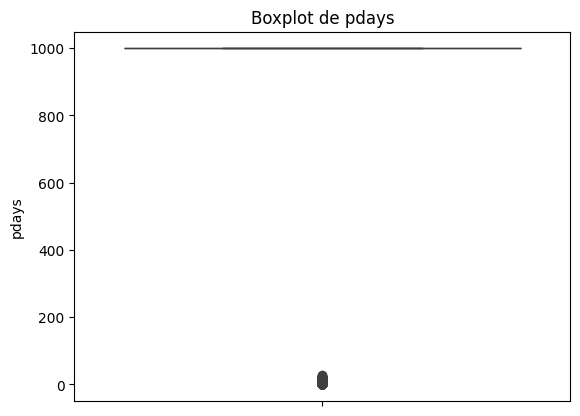

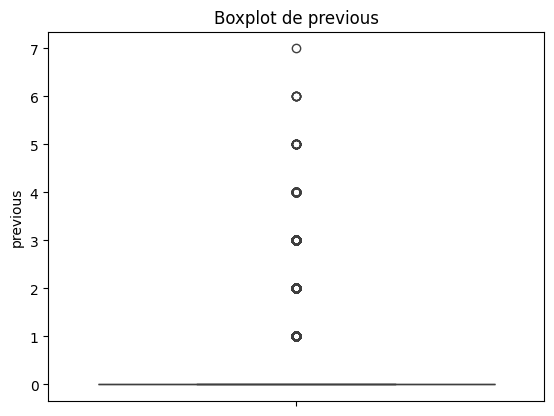

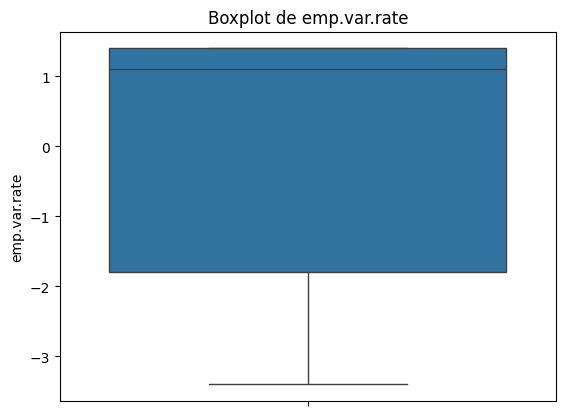

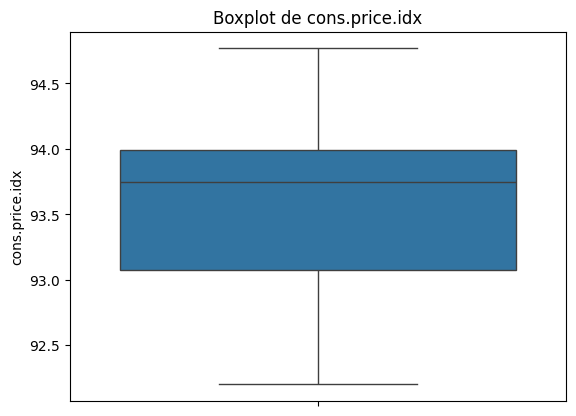

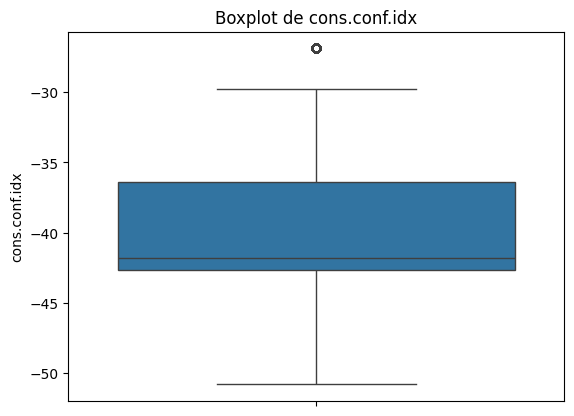

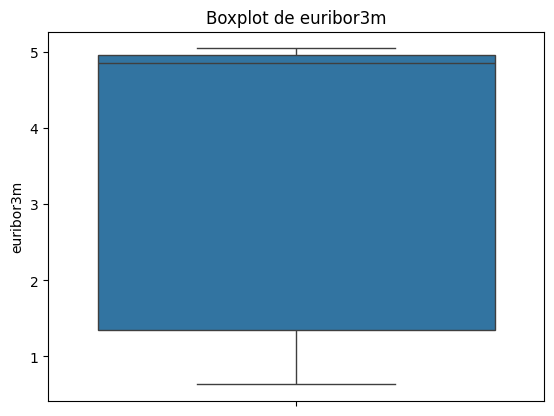

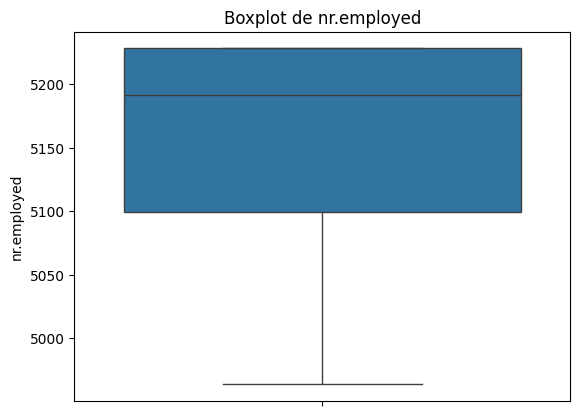

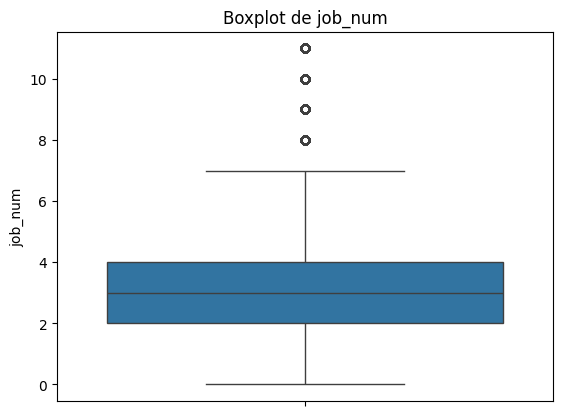

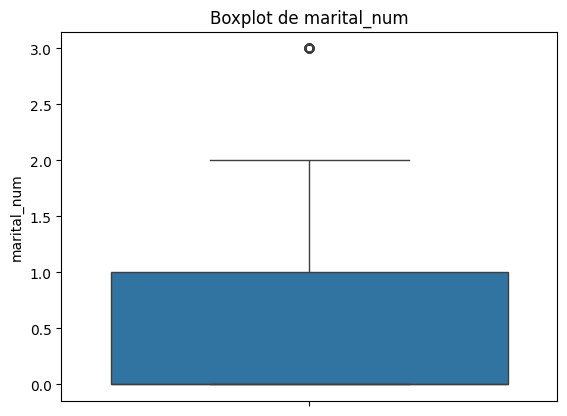

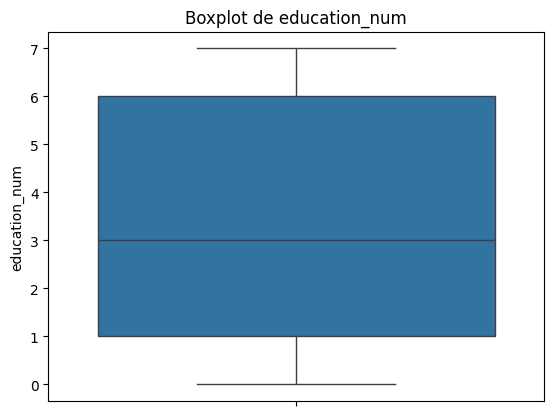

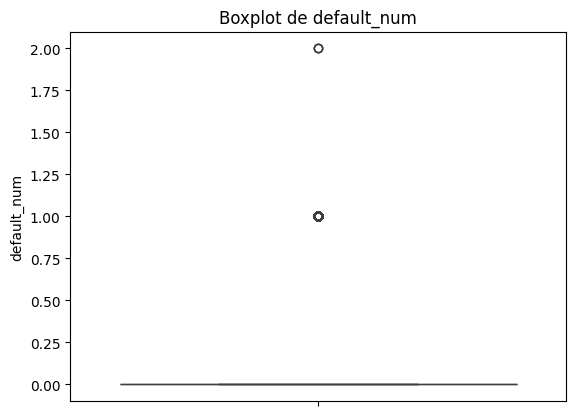

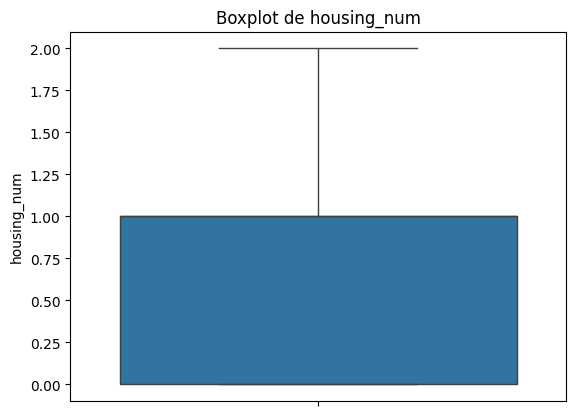

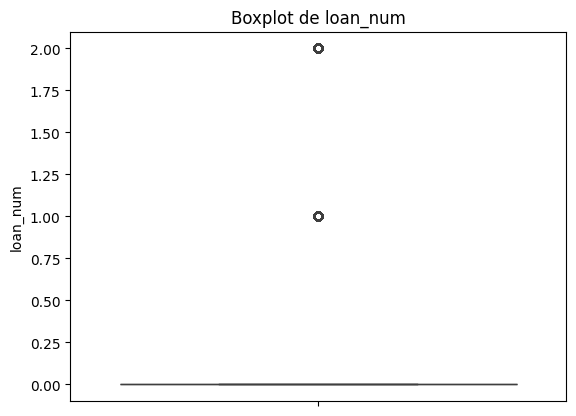

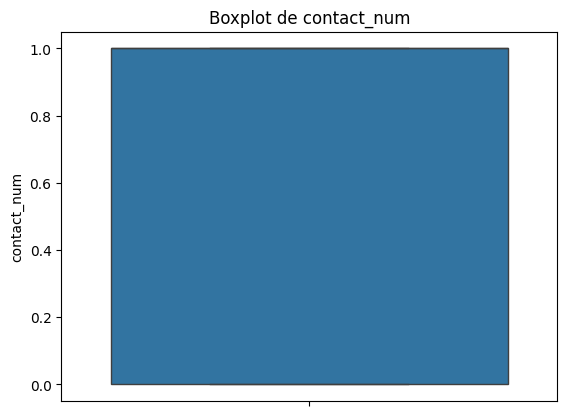

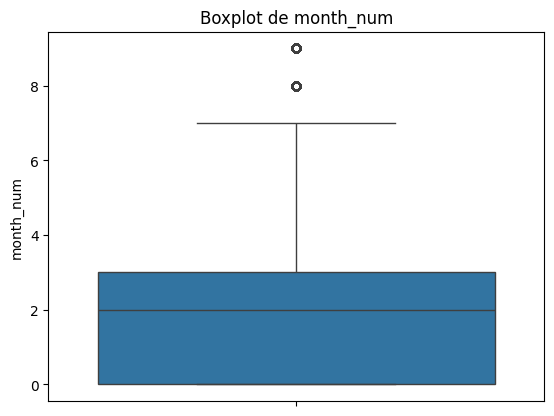

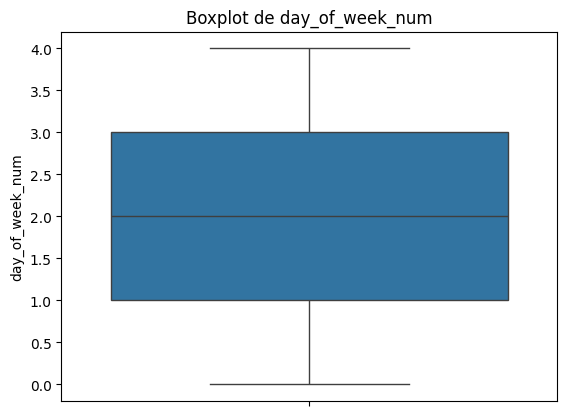

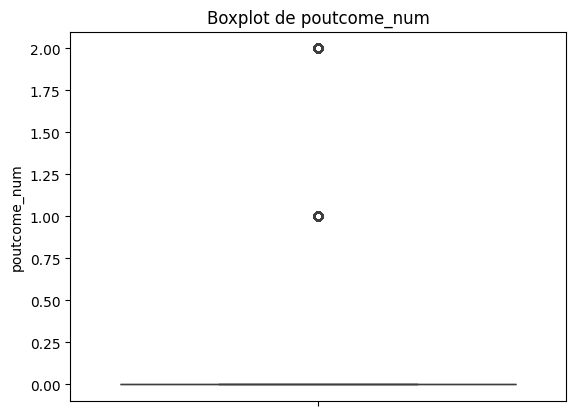

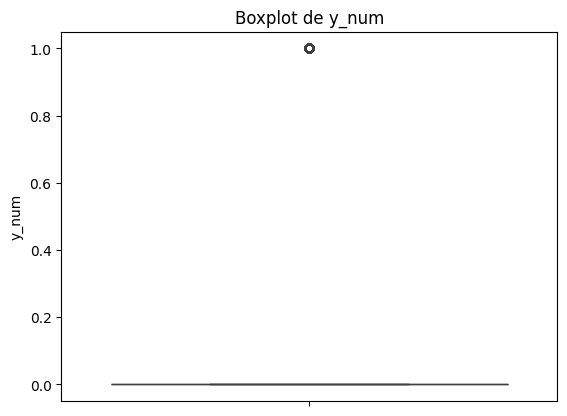

In [51]:
#Aqui vamos a ver los valore atipicos o outliers
for column in df_numerico.columns:
    sns.boxplot(data=df_numerico, y=column)
    plt.title(f'Boxplot de {column}')
    plt.show ()


In [60]:
#ahora homologamos las variables, haciendo que todas las variables entren entre un rango de 0 a 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#antes de aplicar un escalador, tenemos que separar mis datos entre entrenamiento y test
#porque si voy a hacer un escalador solo puede ser con la data de entrenamiento
x = df_numerico.drop ('y_num', axis=1)
y = df_numerico['y_num']
#aqui separamos mi x para test y mi x para entrenamiento
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)
#definimos scaler
scaler = MinMaxScaler()

x_train_esc = scaler.fit_transform(x_train)
#aqui no hacemos fit porque ya esta entrenada
x_test_esc = scaler.transform(x_test)
#aqui el scalador me devuelve un vector o una matriz y debemos tranformarlo a un dataframe
x_train_esc = pd.DataFrame(x_train_esc,columns=x.columns, index=x_train.index)
x_test_esc = pd.DataFrame(x_test_esc,columns=x.columns,index=x_test.index)

X_train.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_num,marital_num,education_num,default_num,housing_num,loan_num,contact_num,month_num,day_of_week_num,poutcome_num
12348,29,286,3,999,0,1.4,93.918,-42.7,4.959,5228.1,10,0,2,0,1,1,0,2,4,0
8565,50,178,6,999,0,1.4,94.465,-41.8,4.864,5228.1,2,1,6,0,0,0,0,1,2,0
21424,29,103,4,999,0,1.4,93.444,-36.1,4.963,5228.1,2,1,6,0,0,0,1,3,1,0
3316,35,135,1,999,0,1.1,93.994,-36.4,4.860,5191.0,2,1,6,0,0,0,0,0,3,0
33246,40,418,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,3,1,1,1,0,0,1,0,1,0


In [69]:
from sklearn.feature_selection import SelectKBest, chi2

selection_model = SelectKBest(chi2,k=10)
selection_model.fit(x_train_esc,y_train)
ix=selection_model.get_support()

x_train_set = pd.DataFrame(selection_model.transform(x_train_esc),columns=x_train_esc.columns.values[ix])
x_test_set = pd.DataFrame(selection_model.transform(x_test_esc),columns=x_test_esc.columns.values[ix])

print (x_train_set.columns)
#con los datos de entrenamiento siempre ajusto todo

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'default_num', 'contact_num', 'month_num',
       'poutcome_num'],
      dtype='object')


In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_set, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


estos son valores que yo le doy al modelo antes de entrenarlo, por lo tanto tomo los valores por defecto, todos estos valores por defecto me dan un acercamiento

pero no son los unicos, yo deberia buscar los mejores hiperparametros



terminar esto revisando clase

In [73]:
y_pred = model.predict(x_test_set)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [74]:
accuracy_score(y_test, y_pred)

0.90165128703254

In [75]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg','lbfgs','sag', 'liblinear','saga']
}

grid= GridSearchCV(model, hyperparameters,scoring='accuracy',cv=5)

In [77]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(x_train_set, y_train)

print (f'mejores hiperparametros (de la grilla): {grid.best_params_}')

mejores hiperparametros (de la grilla): {'C': 0.001, 'penalty': None, 'solver': 'sag'}


In [78]:
best_model = grid.best_estimator_
y_best_pred = best_model.predict(x_test_set)

accuracy_score(y_test, y_best_pred)

0.9022583778533269

In [80]:
from pickle import dump

dump(best_model, open('../models/logistics_regresion_C_0.001_penalty_none_solver_saga','wb'))